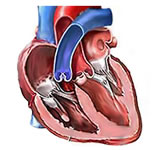

# Heart Disease Prediction

This project will focus on predicting heart disease. Based on attributes such as blood pressure, cholestoral levels, heart rate, and other characteristic attributes, patients will be classified according to varying degrees of coronary artery disease. This project will utilize a dataset of 303 patients distributed by the UCI Machine Learning Repository.

The dataset is available through the University of California, Irvine Machine learning repository. Here is the URL:

http:////archive.ics.uci.edu/ml/datasets/Heart+Disease

This dataset contains patient data concerning heart disease diagnosis that was collected at several locations around the world. There are 76 attributes, including age, sex, resting blood pressure, cholestoral levels, echocardiogram data, exercise habits, and many others. To data, all published studies using this data focus on a subset of 14 attributes - so I have done the same. More specifically, I will use the data collected at the Cleveland Clinic Foundation.

I will be using some common Python libraries, such as pandas, numpy, and matplotlib. Furthermore, for the machine learning side of this project, I will be using sklearn and keras.

Attribute Information:

Only 14 attributes used:
1. (age): age in years
2. (sex): sex (1 = male; 0 = female)
3. (cp): chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic
4. (trestbps): trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. (chol): serum cholestoral in mg/dl
6. (fbs): fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. (restecg): restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. (thalach): thalach: maximum heart rate achieved
9. (exang): exercise induced angina (1 = yes; 0 = no)
10. (oldpeak): oldpeak = ST depression induced by exercise relative to rest
11. (slope): slope: the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping
12. (ca): ca: number of major vessels (0-3) colored by flourosopy
13. (thal): thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. (num) (the predicted attribute): num: diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing
(in any major vessel: attributes 59 through 68 are vessels)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid", color_codes=True)

In [2]:
# Import the heart disease dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# The names will be the names of each column in my pandas DataFrame
names = ['age',
        'sex',
        'cp',
        'trestbps',
        'chol',
        'fbs',
        'restecg',
        'thalach',
        'exang',
        'oldpeak',
        'slope',
        'ca',
        'thal',
        'class']

# Read the csv
cleveland = pd.read_csv(url, names=names)
cleveland.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
cleveland.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,class
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [4]:
cleveland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  class     303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


# Data Wrangling
**1. What kind of cleaning steps did you perform?**

The data looks good and hence no cleaning required as there are no missing values nor there are any text values present in the dataset. Hence no dummy variables required. All the features are of the type float64 except for 'ca' and 'thal' which are object types. I'll concentrate on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0). So, I'll be replacing values 2,3,4 with the value 1.

In [5]:
for i in cleveland['class'].index:
    if cleveland['class'][i] == 2 or cleveland['class'][i] == 3 or cleveland['class'][i] == 4:
        cleveland['class'][i] = 1
print(cleveland['class'])

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: class, Length: 303, dtype: int64


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


**2. How did you deal with missing values, if any?**

There are no missing values in the dataset.

In [6]:
cleveland.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
class       0
dtype: int64

**3. Were there outliers, and how did you handle them?**

To detect the outliers we plot the boxplot for the quantitative features 'age', 'trestbps', 'chol', 'thalach' and 'oldpeak'   as below. No chance of outliers for categorical features. We can see that features 'trestbps', 'chol', 'thalach' and 'oldpeak' have outliers. We have dealt with the outliers by replacing them with mean.

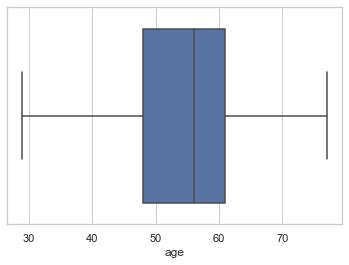

In [7]:
sns.boxplot(cleveland['age'])

The variance for trestbps is 308.72883922055564 



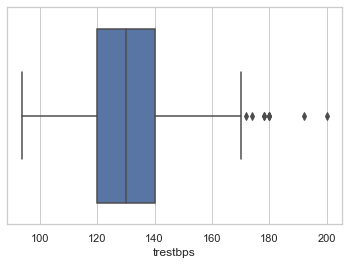

In [8]:
print('The variance for trestbps is', np.var(cleveland['trestbps'].array), '\n')
sns.boxplot(cleveland['trestbps'])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


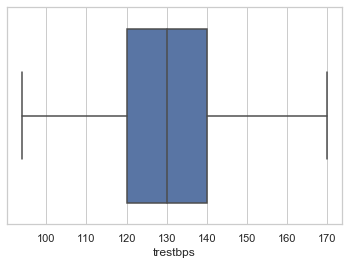

In [9]:
IQR1 = cleveland['trestbps'].quantile(0.75) - cleveland['trestbps'].quantile(0.25)
upper_boundary1 = cleveland['trestbps'].quantile(0.75) + (IQR1 * 1.5)
mean1 = cleveland['trestbps'].mean()
for i in cleveland['trestbps'].index:
    if cleveland['trestbps'][i] > upper_boundary1:
        cleveland['trestbps'][i] = mean1
sns.boxplot(cleveland['trestbps'])

The variance for chol is 2672.0015031206067 



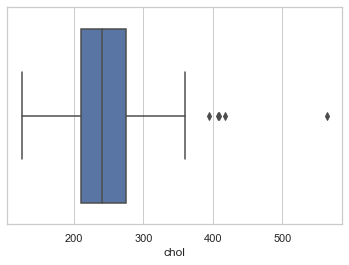

In [10]:
print('The variance for chol is', np.var(cleveland['chol'].array), '\n')
sns.boxplot(cleveland['chol'])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


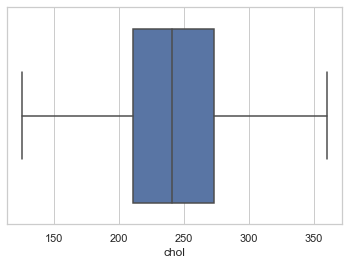

In [11]:
IQR2 = cleveland['chol'].quantile(0.75) - cleveland['chol'].quantile(0.25)
upper_boundary2 = cleveland['chol'].quantile(0.75) + (IQR2 * 1.5)
mean2 = cleveland['chol'].mean()
for i in cleveland['chol'].index:
    if cleveland['chol'][i] > upper_boundary2:
        cleveland['chol'][i] = mean2
sns.boxplot(cleveland['chol'])

The variance for thalach is 521.5388251696455 



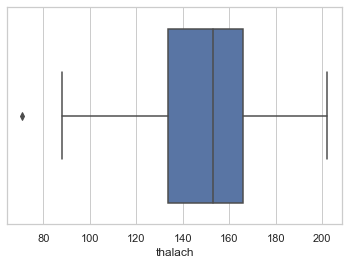

In [12]:
print('The variance for thalach is', np.var(cleveland['thalach'].array), '\n')
sns.boxplot(cleveland['thalach'])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


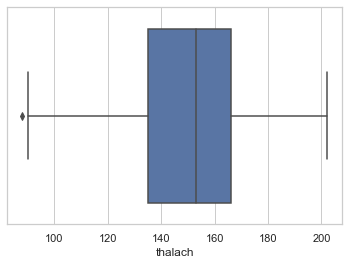

In [13]:
IQR3 = cleveland['thalach'].quantile(0.75) - cleveland['thalach'].quantile(0.25)
lower_boundary3 = cleveland['thalach'].quantile(0.25) - (IQR3 * 1.5)
mean3 = cleveland['thalach'].mean()
for i in cleveland['thalach'].index:
    if cleveland['thalach'][i] < lower_boundary3:
        cleveland['thalach'][i] = mean3
sns.boxplot(cleveland['thalach'])

If variance is high always 1 or 2 points will lie outside the whiskers. They can be ignored.

The variance for oldpeak is 1.3436460477730927 



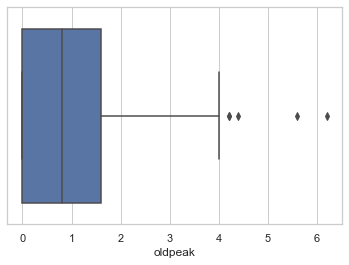

In [14]:
print('The variance for oldpeak is', np.var(cleveland['oldpeak'].array), '\n')
sns.boxplot(cleveland['oldpeak'])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


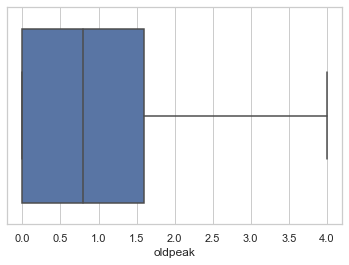

In [15]:
IQR4 = cleveland['oldpeak'].quantile(0.75) - cleveland['oldpeak'].quantile(0.25)
upper_boundary4 = cleveland['oldpeak'].quantile(0.75) + (IQR4 * 1.5)
mean4 = cleveland['oldpeak'].mean()
for i in cleveland['oldpeak'].index:
    if cleveland['oldpeak'][i] > upper_boundary4:
        cleveland['oldpeak'][i] = mean4
sns.boxplot(cleveland['oldpeak'])

# Data Storytelling

**Let's explore the features.**

**1. How many people are suffering from heart disease?**

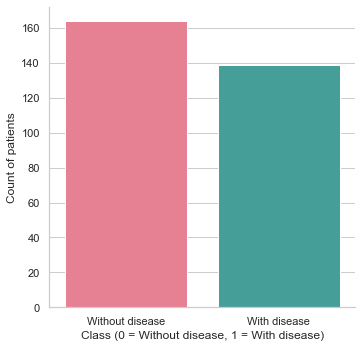

In [16]:
ax = sns.catplot(x='class', kind='count',data=cleveland, palette='husl')
plt.xlabel('Class (0 = Without disease, 1 = With disease)')
plt.ylabel('Count of patients')
ax.set_xticklabels(['Without disease', 'With disease'])

**2. Are males more prone to heart disease than females?**

Yes.

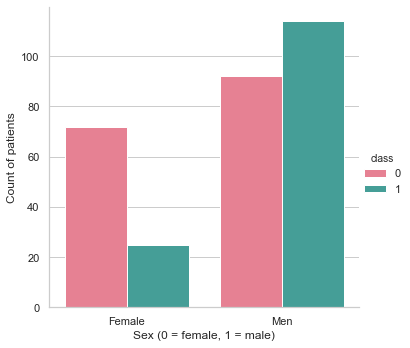

In [17]:
ax = sns.catplot(x='sex', hue='class', kind='count',data=cleveland, palette='husl')
plt.xlabel('Sex (0 = female, 1 = male)')
plt.ylabel('Count of patients')
ax.set_xticklabels(['Female', 'Men'])

**3. Which age group is more prone to heart disease?**

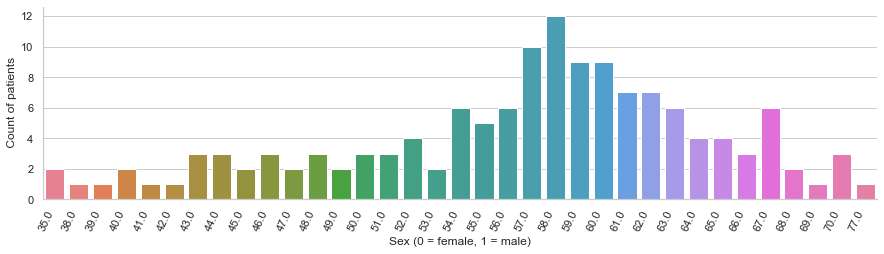

In [18]:
ax = sns.catplot(x='age', kind='count', data=cleveland[cleveland['class'] == 1], palette='husl', aspect=3.5, height=3.5)
plt.xlabel('Sex (0 = female, 1 = male)')
plt.ylabel(' Count of patients')
ax.set_xticklabels(rotation=65, horizontalalignment='right')

**INSIGHT**: The age group 57 to 60 is more prone to heart disease.

**4. Is there a relation between fasting blood sugar and heart disease?**

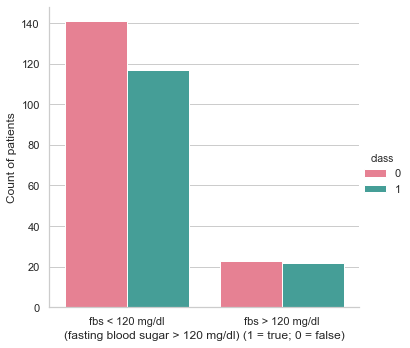

In [19]:
ax = sns.catplot(x='fbs', hue='class', kind='count',data=cleveland, palette='husl')
plt.xlabel('(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.ylabel('Count of patients')
ax.set_xticklabels(['fbs < 120 mg/dl', 'fbs > 120 mg/dl'])

**INSIGHT** : People having fps < 120 have more chance of having Heart Disease than people havnig fps >120.

**5. Is there a relation between resting electrocardiographic results and heart disease?**

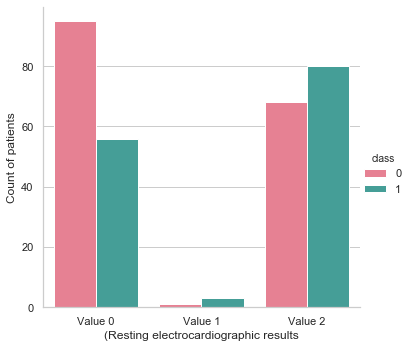

In [20]:
ax = sns.catplot(x='restecg', hue='class', kind='count',data=cleveland, palette='husl')
plt.xlabel('(Resting electrocardiographic results')
plt.ylabel('Count of patients')
ax.set_xticklabels(['Value 0', 'Value 1', 'Value 2'])

**INSIGHT** : If resting electrocardiographic is 2 then person have more chances of suffering from Heart Disease.

**6. Is there a relation between  slope of the peak exercise ST segment and heart disease?**

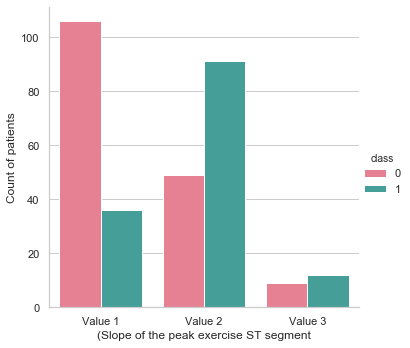

In [21]:
ax = sns.catplot(x='slope', hue='class', kind='count',data=cleveland, palette='husl')
plt.xlabel('(Slope of the peak exercise ST segment')
plt.ylabel('Count of patients')
ax.set_xticklabels(['Value 1', 'Value 2', 'Value 3'])

**INSIGHT** : People having up flat slope are more prone to Heart Disease than upsloping and downsloping.

**Let's explore continuous data against categorical and ordinal data.**

**1. Trestbps.**

Text(0.5, 1.0, 'Trestbps V/S CA (Major Vessel Coloured)')

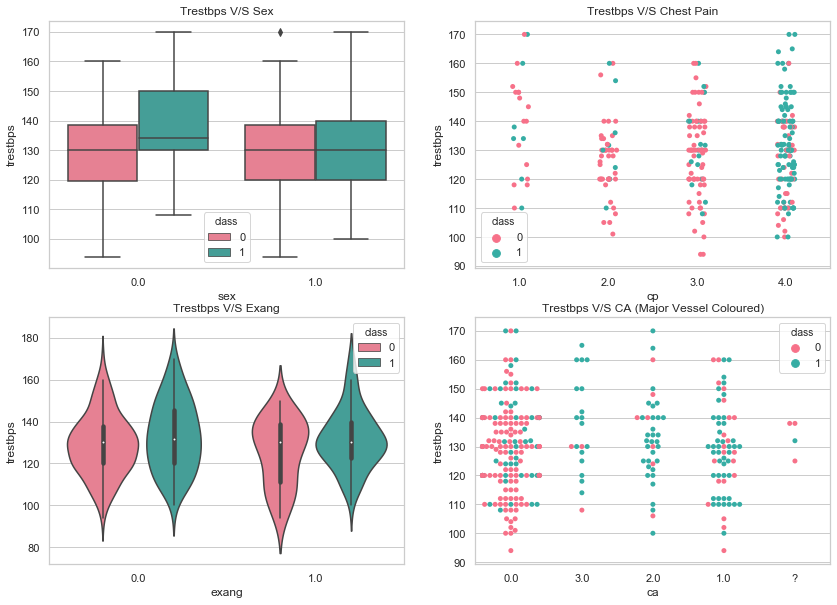

In [22]:
fig, ax = plt.subplots(2, 2 ,figsize=(14,10))
sns.boxplot(x='sex', y='trestbps',data=cleveland, hue='class', ax=ax[0][0], palette='husl')
ax[0,0].set_title("Trestbps V/S Sex")
sns.stripplot(x='cp', y='trestbps',data=cleveland, hue='class', ax=ax[0][1], palette='husl')
ax[0,1].set_title("Trestbps V/S Chest Pain")
sns.violinplot(x='exang', y='trestbps',data=cleveland, hue='class', ax=ax[1][0], palette='husl')
ax[1,0].set_title("Trestbps V/S Exang")
sns.swarmplot(x='ca', y='trestbps',data=cleveland, hue='class', ax=ax[1][1], palette='husl')
ax[1,1].set_title("Trestbps V/S CA (Major Vessel Coloured)")

**INSIGHT:** Based on above analysis we can say that gender plays minor role with respect to blood pressure (trestbps). But chest pain play's vital role . As chest pain increases blood pressure will also increases along with chances of heart diseases.

**2. Cholestrol.**

Text(0.5, 1.0, 'Cholestrol V/S Thal')

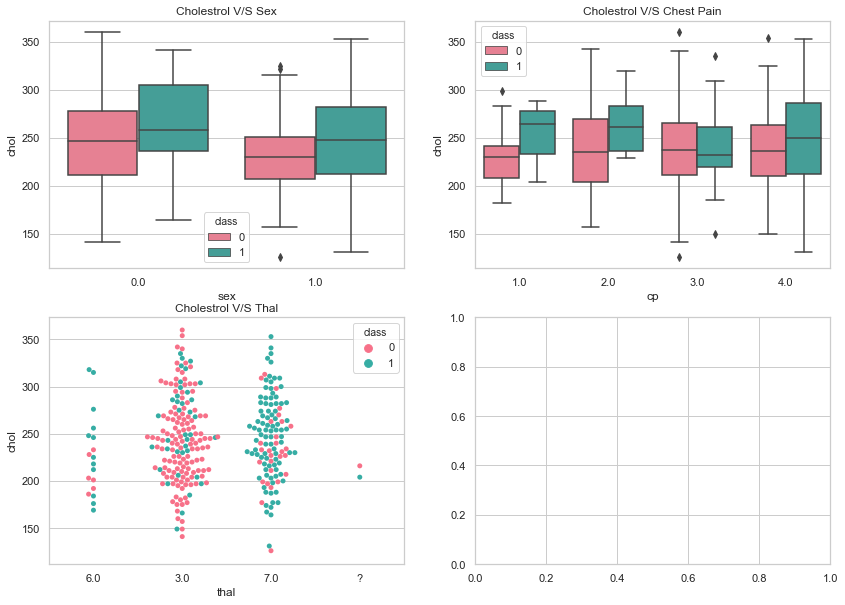

In [23]:
fig, ax  = plt.subplots(2,2,figsize=(14,10))
sns.boxplot(x='sex', y='chol',data=cleveland, hue='class', ax=ax[0,0], palette='husl')
ax[0,0].set_title("Cholestrol V/S Sex")
sns.boxplot(x='cp', y='chol', data=cleveland, hue='class', ax=ax[0,1], palette='husl')
ax[0,1].set_title("Cholestrol V/S Chest Pain")
sns.swarmplot(x='thal', y='chol', data=cleveland, hue='class', ax=ax[1,0], palette='husl')
ax[1,0].set_title("Cholestrol V/S Thal")

**INSIGHT:** Female have higher cholestrol level than men. Chances of heart diseases decreases with decrease in cholestrol level.

**3. Oldpeak.**

Text(0.5, 1.0, 'oldpeak V/S CA')

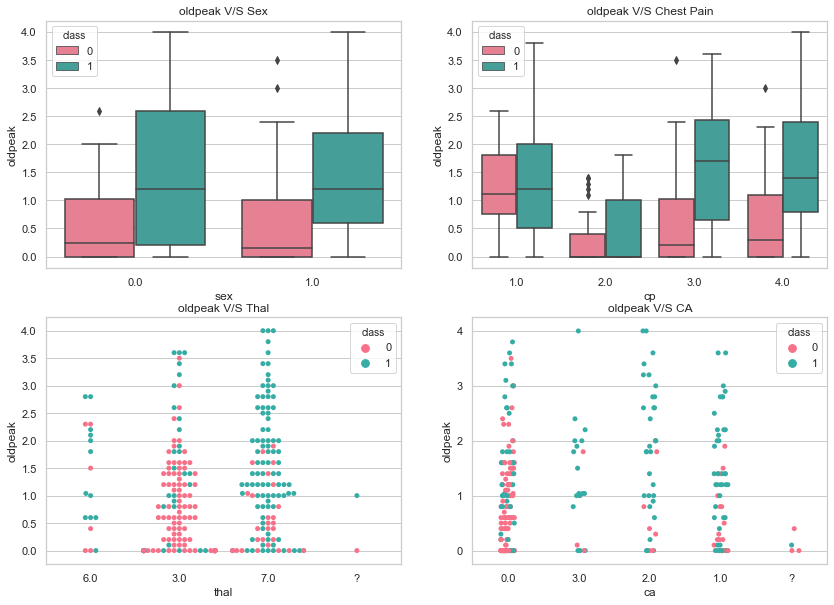

In [24]:
fig, ax = plt.subplots(2,2,figsize=(14,10))
sns.boxplot(x='sex', y='oldpeak', data=cleveland, hue='class', ax=ax[0,0], palette='husl')
ax[0,0].set_title("oldpeak V/S Sex")
sns.boxplot(x='cp', y='oldpeak', data=cleveland, hue='class', ax=ax[0,1], palette='husl')
ax[0,1].set_title("oldpeak V/S Chest Pain")
sns.swarmplot(x='thal', y='oldpeak', data=cleveland, hue='class', ax=ax[1,0], palette='husl')
ax[1,0].set_title("oldpeak V/S Thal")
sns.stripplot(x='ca', y='oldpeak', data=cleveland, hue='class', ax=ax[1,1], palette='husl')
ax[1,1].set_title("oldpeak V/S CA")

**INSIGHT:** If oldpeak is less then people will have less chances of having heart diseases.